# Loan Prediction based on Customer Behaviour [EDA+Prediction]

In [1]:
# Importing Librabies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv(r'D:\Data Science 6pm\Projects\My Projects\Bank loan risk analysis\Training Data.csv')

In [3]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


### Data cleaning + EDA 

In [4]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [5]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [6]:
df.shape

(252000, 13)

In [7]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [8]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [9]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

### Cleaning names with characters and Numbers 

In [10]:
def unclean_names(col):
    unclean_names = []
    for name in df[str(col)].unique():
        if name.endswith(']'):
            unclean_names.append(name)
    return unclean_names

In [11]:
unclean_city_names = unclean_names('CITY')
unclean_city_names

['Tiruchirappalli[10]',
 'Kota[6]',
 'Hajipur[31]',
 'Erode[17]',
 'Anantapuram[24]',
 'Aurangabad[39]',
 'Purnia[26]',
 'Eluru[25]',
 'Siwan[32]',
 'Motihari[34]',
 'Warangal[11][12]',
 'Jehanabad[38]',
 'Kishanganj[35]',
 'Tirupati[21][22]',
 'Kurnool[18]',
 'Kadapa[23]',
 'Jammu[16]',
 'Rajahmundry[19][20]',
 'Saharsa[29]',
 'Jamalpur[36]',
 'Dehri[30]',
 'Nellore[14][15]',
 'Visakhapatnam[4]',
 'Buxar[37]',
 'Ramagundam[27]',
 'Sasaram[30]',
 'Guntur[13]',
 'Chittoor[28]',
 'Bettiah[33]',
 'Mysore[7][8][9]']

In [ ]:
unclean_state_names = unclean_names('STATE')
unclean_state_names

In [12]:
def clean_df(df,col,unclean_list):
    for index,name in enumerate(df[col]):
        if name in unclean_list:
            if name.endswith(']'):
                name_ = name.strip('[]0123456789')
                df[col].iloc[index] = name_

In [13]:
clean_df(df,'STATE',unclean_state_names)

NameError: name 'unclean_state_names' is not defined

In [14]:
clean_df(df,'CITY',unclean_city_names)

C:\Users\SAMEER\AppData\Local\Temp\ipykernel_8432\1241009451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[index] = name_


In [ ]:
df['CITY']

In [ ]:
df.head(5)

###  Data Visualization
Checking for any Outliers

In [ ]:
df['Age'].plot(kind='hist',figsize=(10,8))
plt.xlabel('Age')

In [ ]:
df['Income'].plot(kind='box')

In [ ]:
df['Income'].plot(kind='hist')


In [ ]:
df['CURRENT_JOB_YRS'].plot(kind='box')

In [ ]:
df['CURRENT_HOUSE_YRS'].plot(kind='box')

In [ ]:
df['Experience'].plot(kind='box')

In [ ]:
df['Experience'].plot(kind='hist')

In [ ]:
df['Experience'].plot(kind='box')

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1,anchor='C')
plt.title('Information')
df.groupby('Risk_Flag').count()['Id'].plot(kind='pie',labels=['Non-Defaulter','Defaulter'],autopct='%1.1f%%',ax=ax1,figsize=(10,10))
plt.xlabel('% of Defaulters')
plt.ylabel('')
plt.legend(loc='right',bbox_to_anchor=(0.7,0,1,1))
ax2 = fig.add_subplot(2,1,2,anchor='S')
df.groupby('Risk_Flag').count()['Id'].plot(kind='bar',ax=ax2)
plt.xlabel('Defaulters')
plt.ylabel('Count')
for index,value in enumerate(df.groupby('Risk_Flag').count()['Id']):
    plt.text(index-0.08,value+10000,str(value))
plt.ylim(0,250000)
plt.show()

In [ ]:
df.groupby('Married/Single').count()['Id'].plot(kind='pie',startangle=0,labels=['Married','Single'],autopct='%1.1f%%',colors=['Pink','Teal'])
plt.ylabel('')
plt.xlabel('Marital Status')
plt.title('Total % of Customers who are married/single')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

In [ ]:
df.loc[df['Risk_Flag'] == 1].groupby('Married/Single').count()['Id']


In [ ]:
marital_status = df.loc[df['Risk_Flag'] == 1].groupby('Married/Single').count()['Id']
marital_status.plot(kind='pie',startangle=0,labels=['Married','Single'],autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('Marital Status')
plt.title('Loan Defaulters % by Marital Status')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

In [ ]:
house_ownership_count = df.groupby('House_Ownership').count()['Id']
house_ownership_count = [231898,7184,12918]

(0.0, 250000.0)

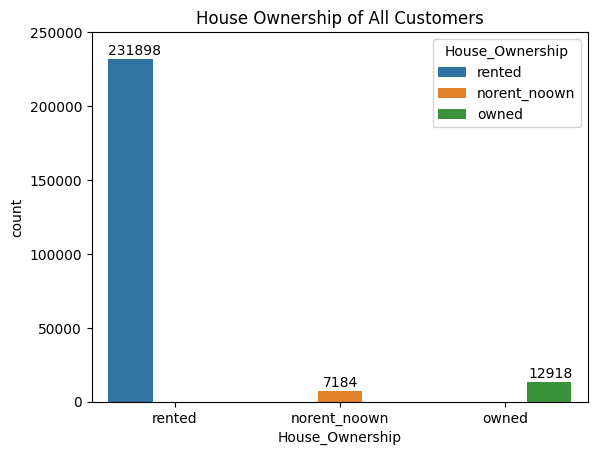

In [15]:
sns.countplot(data=df,x='House_Ownership',hue='House_Ownership',)
plt.text(-0.4,235000,str(231898))
plt.text(0.9,10000,str(7184))
plt.text(2.14,16000,str(12918))
plt.title('House Ownership of All Customers')
plt.ylim(0,250000)

In [16]:
df.loc[df['Risk_Flag'] == 1].groupby('House_Ownership').count()['Id']

House_Ownership
norent_noown      715
owned            1160
rented          29121
Name: Id, dtype: int64

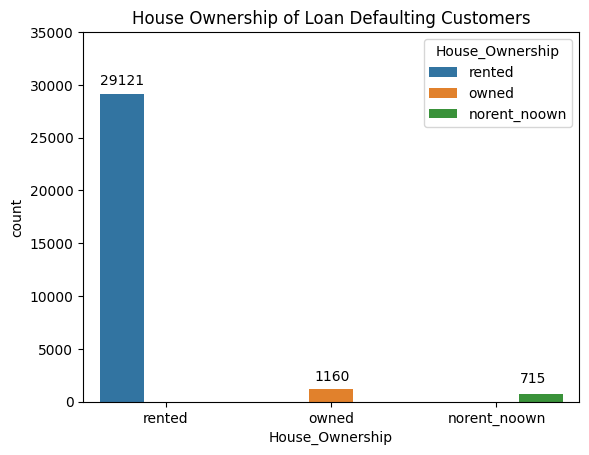

In [17]:
sns.countplot(data=df.loc[df['Risk_Flag'] == 1],x='House_Ownership',hue='House_Ownership')
plt.text(-0.4,30000,str(29121))
plt.text(0.9,2000,str(1160))
plt.text(2.14,1800,str(715))
plt.ylim(0,35000)
plt.title('House Ownership of Loan Defaulting Customers')
plt.show()

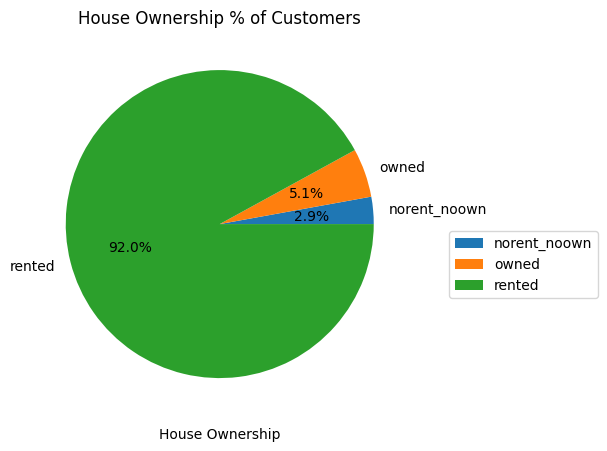

In [18]:
df.groupby('House_Ownership').count()['Id'].plot(kind='pie',startangle=0,autopct='%1.1f%%',figsize=(5,5))
plt.ylabel('')
plt.xlabel('House Ownership')
plt.title('House Ownership % of Customers')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))

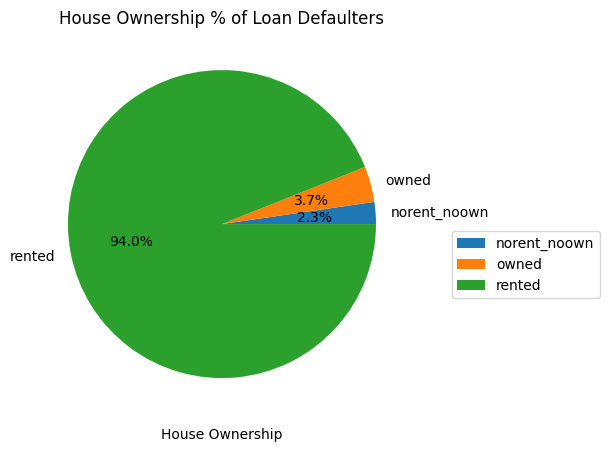

In [19]:
df.loc[df['Risk_Flag'] == 1].groupby('House_Ownership').count()['Id'].plot(kind='pie',startangle=0,autopct='%1.1f%%',figsize=(5,5))
plt.ylabel('')
plt.title('House Ownership % of Loan Defaulters')
plt.xlabel('House Ownership')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))

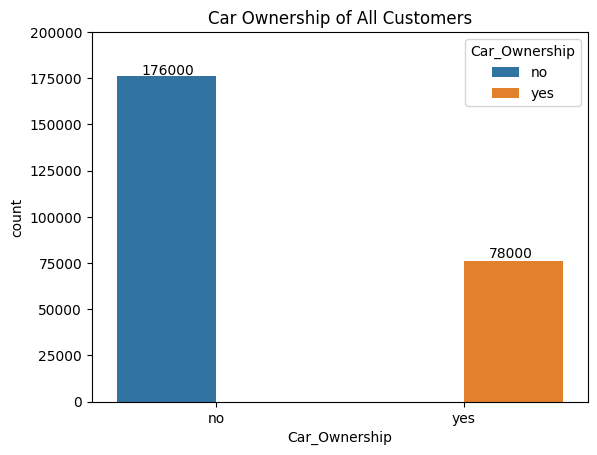

In [20]:
sns.countplot(data=df,x='Car_Ownership',hue='Car_Ownership')
plt.text(-0.3,177000,str(176000))
plt.text(1.1,78000,str(78000))
plt.ylim(0,200000)
plt.title('Car Ownership of All Customers')
plt.show()

In [21]:
car_ownership.plot(kind='pie',startangle=0,labels=['Do not Own','Own'],autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('Car Ownership')
plt.title('Car Ownership % of All Customers')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

NameError: name 'car_ownership' is not defined

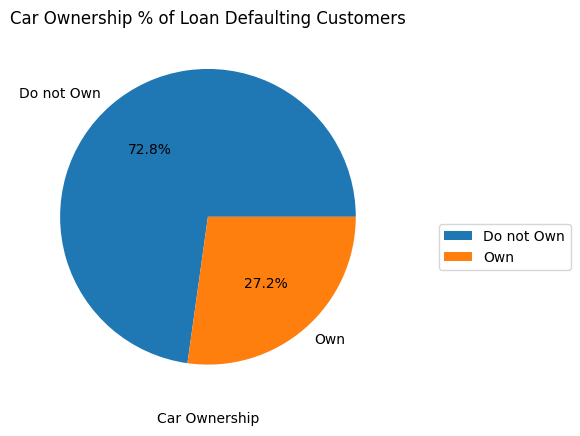

In [22]:
car_ownership_default = df.loc[df['Risk_Flag'] == 1].groupby('Car_Ownership').count()['Id']
car_ownership_default.plot(kind='pie',startangle=0,labels=['Do not Own','Own'],autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('Car Ownership')
plt.title('Car Ownership % of Loan Defaulting Customers')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

In [23]:
df1 = df.loc[df['Risk_Flag'] == 1].groupby(['STATE','Risk_Flag']).count()
df1.rename(columns={'Id':'Total_Defaulters'},inplace=True)
df1.reset_index(inplace=True)
df1[['STATE','Total_Defaulters']]

,STATE,Total_Defaulters
0,Andhra_Pradesh,2935
1,Assam,930
2,Bihar,2583
3,Chandigarh,61
4,Chhattisgarh,511
5,Delhi,574
6,Gujarat,1343
7,Haryana,980
8,Himachal_Pradesh,111
9,Jammu_and_Kashmir,283


In [24]:
df2 = df.groupby('STATE').count()
df2.rename(columns={'Id':'Total_Loans'},inplace=True)
df2.reset_index(inplace=True)

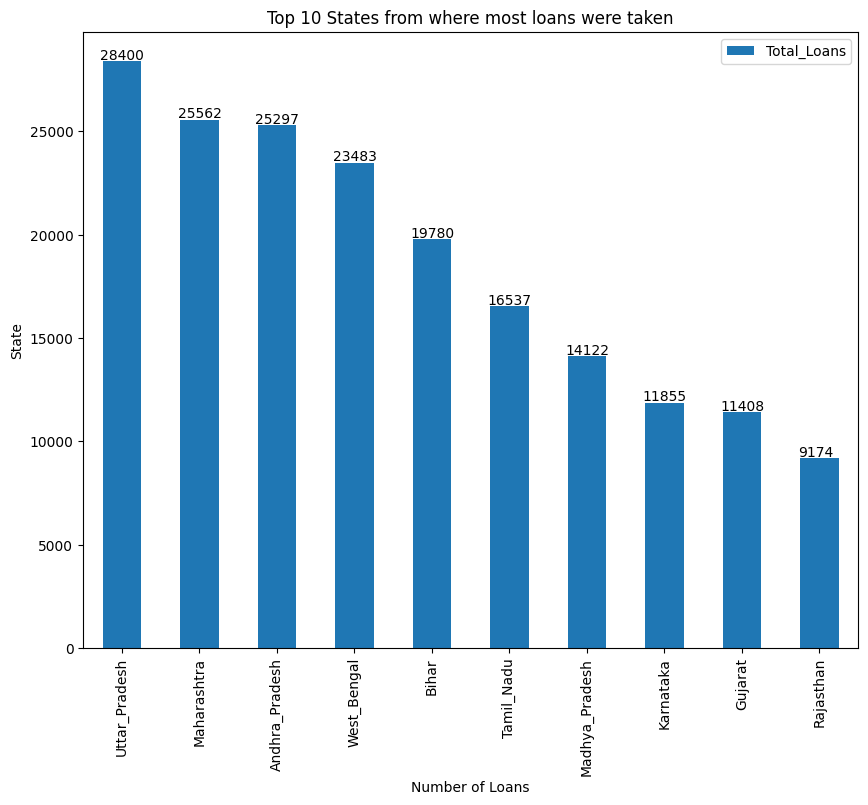

In [25]:
df_total_loans = df2[['STATE','Total_Loans']].sort_values(by='Total_Loans',ascending=False)[:10]
df_total_loans.plot(kind='bar',x='STATE',figsize=(10,8))
plt.title('Top 10 States from where most loans were taken')
plt.xlabel('Number of Loans')
plt.ylabel('State')
for index,value in enumerate(df_total_loans['Total_Loans'][:10]):
    plt.text(index-0.28,value+100,str(value))
plt.show()

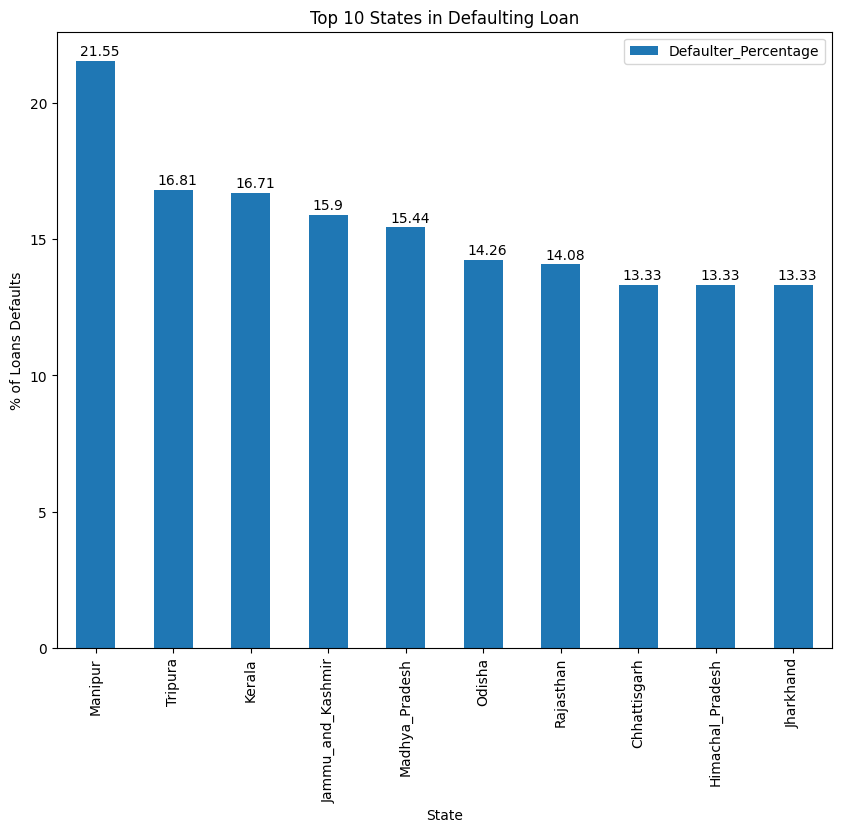

In [26]:
defaulter_percent_per_state = (df1['Total_Defaulters']/df2['Total_Loans']).round(4)*100
state_defaulters_percentage=pd.DataFrame(
    data=zip(df1['STATE'],defaulter_percent_per_state),
    columns=['STATE','Defaulter_Percentage']
)
df_dps = state_defaulters_percentage.sort_values(by='Defaulter_Percentage',ascending=False)[:10]
df_dps.plot(kind='bar',figsize=(10,8),x='STATE')
plt.title('Top 10 States in Defaulting Loan')
plt.ylabel('% of Loans Defaults')
plt.xlabel('State')
for index,value in enumerate(df_dps['Defaulter_Percentage'][:10]):
    plt.text(index-0.2,value+0.2,str(round(value,2)))
plt.legend(loc='best')
plt.show()

In [27]:
df3 = df.groupby('CITY').count()
df3.rename(columns={'Id':'Total_Loans'},inplace=True)
df3.reset_index(inplace=True)
df3[['CITY','Total_Loans']]

,CITY,Total_Loans
0,Adoni,953
1,Agartala,809
2,Agra,1012
3,Ahmedabad,649
4,Ahmednagar,645
...,...,...
311,Vijayanagaram,1259
312,Vijayawada,1172
313,Visakhapatnam,971
314,Warangal,459


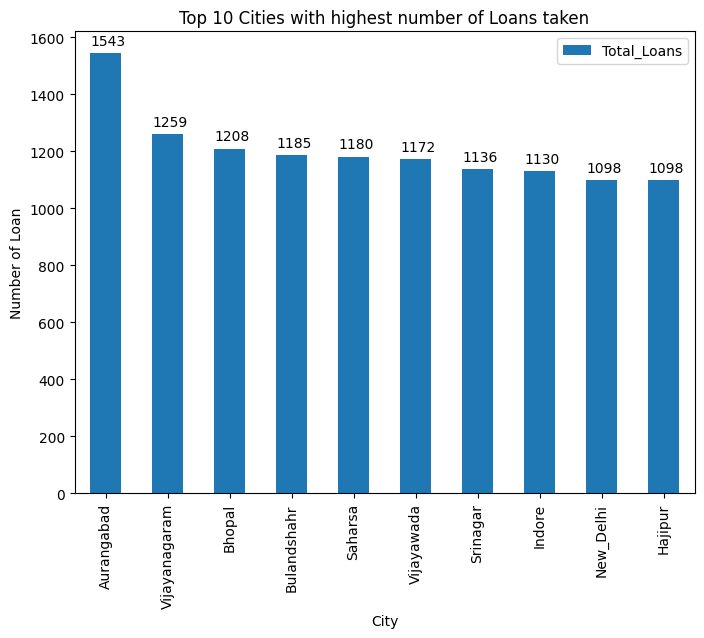

In [28]:
#top10 cities in number of loans

df3_ = df3[['CITY','Total_Loans']].sort_values(
                        by='Total_Loans',ascending=False)[:10]
df3_.plot(kind='bar',x='CITY',figsize=(8,6))
plt.title('Top 10 Cities with highest number of Loans taken')
plt.xlabel('City')
plt.ylabel('Number of Loan')
for index,value in enumerate(df3_['Total_Loans']):
    plt.text(index-0.25,value+30,str(int(value)))
plt.legend(loc='best')
plt.show()

In [29]:
df4 = df.loc[df['Risk_Flag'] == 1].groupby('CITY').count()
df4.rename(columns={'Id':'Total_Defaulters'},inplace=True)
df4.reset_index(inplace=True)
df4[['CITY','Total_Defaulters']]

,CITY,Total_Defaulters
0,Adoni,103
1,Agartala,136
2,Agra,81
3,Ahmedabad,133
4,Ahmednagar,38
...,...,...
311,Vijayanagaram,149
312,Vijayawada,147
313,Visakhapatnam,141
314,Warangal,25


In [30]:
defaulter_percent_per_city = (df4['Total_Defaulters']/df3['Total_Loans']).round(4)*100
city_defaulters_percentage=pd.DataFrame(
    data=zip(df3['CITY'],defaulter_percent_per_city),
    columns=['CITY','Defaulter_Percentage']
)
city_defaulters_percentage

,CITY,Defaulter_Percentage
0,Adoni,10.81
1,Agartala,16.81
2,Agra,8.00
3,Ahmedabad,20.49
4,Ahmednagar,5.89
...,...,...
311,Vijayanagaram,11.83
312,Vijayawada,12.54
313,Visakhapatnam,14.52
314,Warangal,5.45


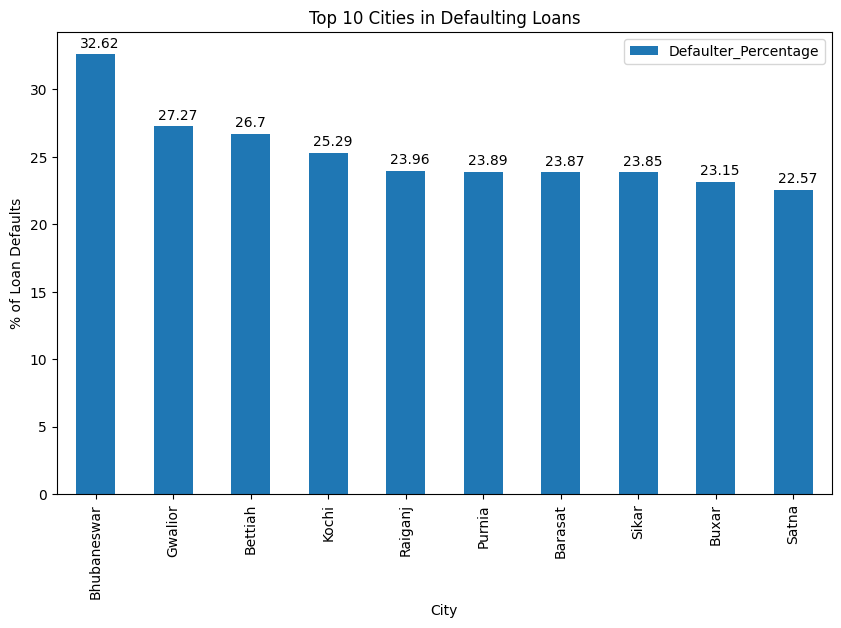

In [31]:
city_defaulters_percentage.sort_values(by='Defaulter_Percentage',ascending=False)[:10].plot(kind='bar',x='CITY',figsize=(10,6))
plt.title('Top 10 Cities in Defaulting Loans')
plt.xlabel('City')
plt.ylabel('% of Loan Defaults')
plt.legend(loc='best')
top_10_vals = city_defaulters_percentage['Defaulter_Percentage'].sort_values(ascending=False)[:10]
for index,value in enumerate(top_10_vals):
    plt.text(index-0.2,value+0.5,str(round(value,2)))
plt.show()

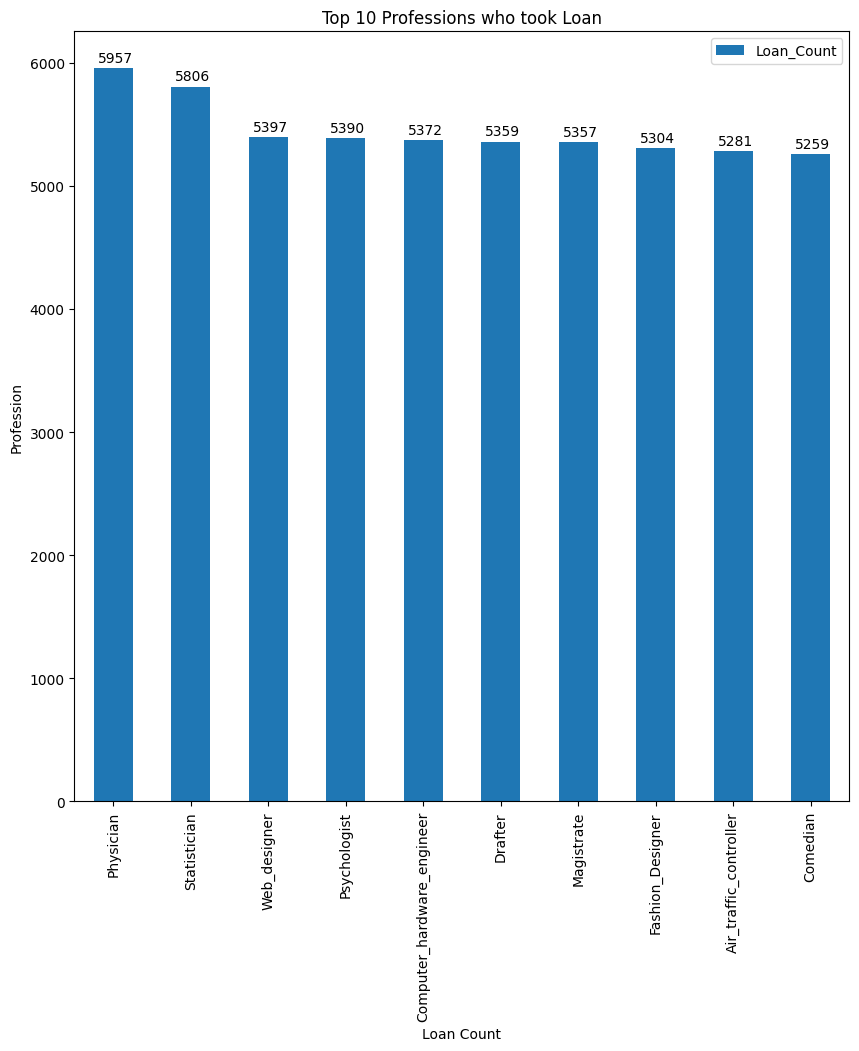

In [32]:
df_profession_loan_count = df.groupby('Profession').count()['Id'].sort_values(ascending=False)
df_plc = df_profession_loan_count.reset_index()
df_plc.rename(columns= {'Id':'Loan_Count'},inplace=True)
df_plc[:10].plot(kind='bar',x='Profession',figsize=(10,10))
plt.legend(loc='best')
plt.title('Top 10 Professions who took Loan')
plt.xlabel('Loan Count')
plt.ylabel('Profession')
for index,value in enumerate(df_plc['Loan_Count'][:10]):
    plt.text(index-0.2,value+50,str(value))
plt.show() 

In [ ]:
profession = df.groupby(['Profession']).mean()[['Income','Risk_Flag']]


In [33]:
#plotting top10 profession_group with higher income

profession_top10_income = profession['Income'].sort_values(ascending=False)[:15]
profession_top10_income.plot(kind='barh',figsize=(10,10))
plt.title('Top 15 Profession with higher Income (mean)')
plt.xlabel('Profession')
plt.ylabel('Income')

for index,value in enumerate(profession_top10_income):
    plt.text(value-900000,index-0.1,str(int(value)))
plt.legend(loc='best')
plt.show()

NameError: name 'profession' is not defined

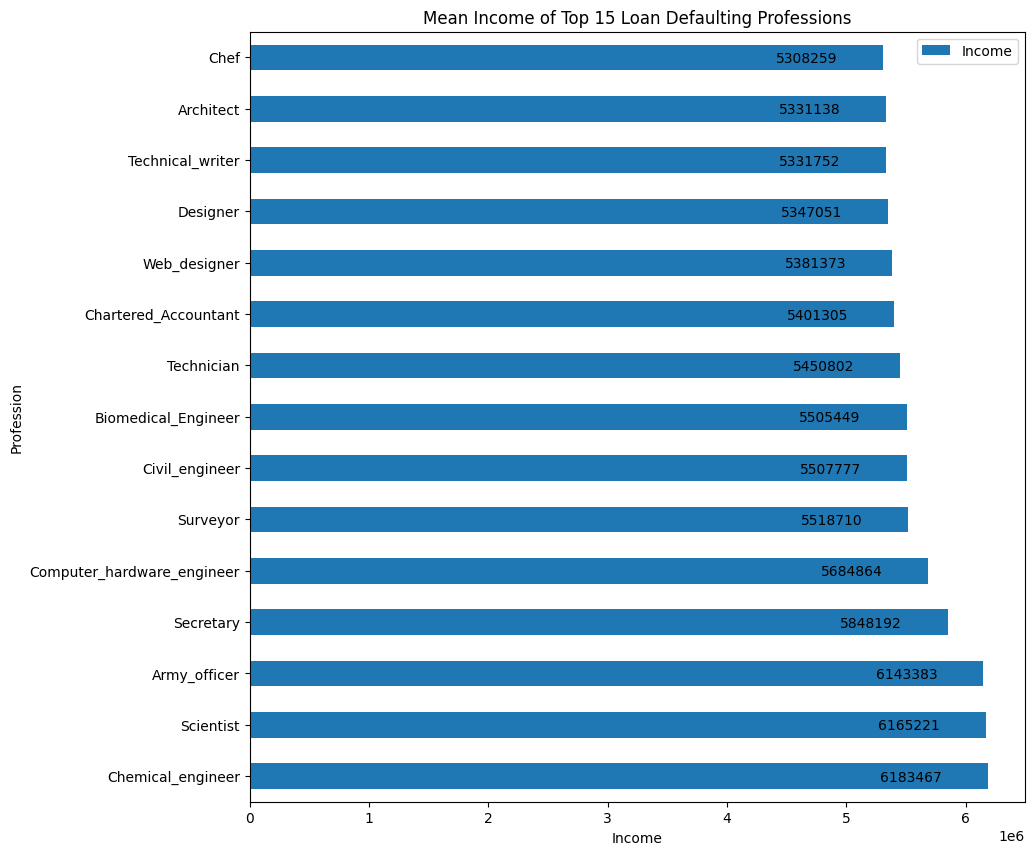

In [34]:
df_ = df.loc[df['Risk_Flag'] == 1].groupby(['Profession']).mean()[['Income']].sort_values(by='Income',ascending=False)
df_.sort_values(by='Income',ascending=False)[:15].plot(kind='barh',figsize=(10,10))
plt.title('Mean Income of Top 15 Loan Defaulting Professions') 
plt.xlabel('Income')
plt.ylabel('Profession')
for index,value in enumerate(df_['Income'][:15]):
    plt.text(value-900000,index-0.1,str(int(value)))

plt.legend(loc='best')
plt.show()

### Resampling the Data with Random Oversampler 

In [35]:
from imblearn.over_sampling import RandomOverSampler

In [36]:
sampler = RandomOverSampler(random_state=42,sampling_strategy=0.45)
X = df.iloc[:,:-1]
y = df['Risk_Flag']

In [37]:
print(X)

            Id   Income  Age  Experience Married/Single House_Ownership  \
0            1  1303834   23           3         single          rented   
1            2  7574516   40          10         single          rented   
2            3  3991815   66           4        married          rented   
3            4  6256451   41           2         single          rented   
4            5  5768871   47          11         single          rented   
...        ...      ...  ...         ...            ...             ...   
251995  251996  8154883   43          13         single          rented   
251996  251997  2843572   26          10         single          rented   
251997  251998  4522448   46           7         single          rented   
251998  251999  6507128   45           0         single          rented   
251999  252000  9070230   70          17         single          rented   

       Car_Ownership           Profession             CITY           STATE  \
0                 no 

In [38]:
print(y)

0         0
1         0
2         0
3         1
4         1
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Risk_Flag, Length: 252000, dtype: int64


In [39]:
X_sampled,y_sampled = sampler.fit_resample(X,y)

In [40]:
from collections import Counter
print(Counter(y),Counter(y_sampled))

Counter({0: 221004, 1: 30996}) Counter({0: 221004, 1: 99451})


In [41]:
df_ = pd.concat([X_sampled,y_sampled],axis=1)

# 
Now we can see that the classes are more even which makes easier for our model to predict loan defaulters


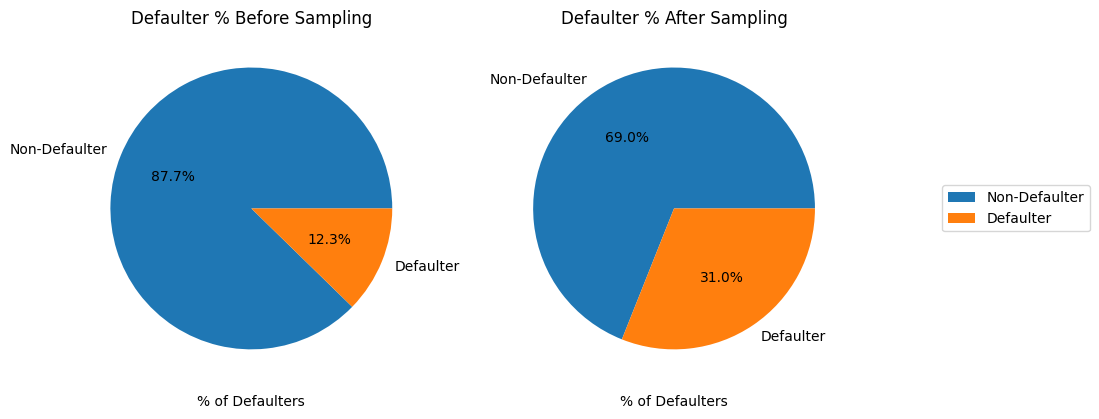

In [42]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.title('Defaulter % Before Sampling')
df.groupby('Risk_Flag').count()['Id'].plot(kind='pie',labels=['Non-Defaulter','Defaulter'],autopct='%1.1f%%',ax=ax1,figsize=(10,10))
plt.xlabel('% of Defaulters')
plt.ylabel('')

ax2 = fig.add_subplot(122)
plt.title('Defaulter % After Sampling')
df_.groupby('Risk_Flag').count()['Id'].plot(kind='pie',labels=['Non-Defaulter','Defaulter'],autopct='%1.1f%%',ax=ax2,figsize=(10,10))
plt.xlabel('% of Defaulters')
plt.ylabel('')
plt.legend(loc='right',bbox_to_anchor=(0.7,0,1,1))

### Encoding the Categorical data

In [43]:
from sklearn.preprocessing import LabelEncoder


In [44]:
cols_to_encode= ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
labelencoder = LabelEncoder()

for col in cols_to_encode:
    df_[col] = labelencoder.fit_transform(df_[col])

##
Checking if there is any null exists in our dataset

In [45]:
df_.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [46]:
df = df.drop(['Id'], axis = 1)
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil_Nadu,3,14,1


In [47]:
X = df_.iloc[:,:-1]
y = df_['Risk_Flag']


In [48]:
# Splitting data intp Training and Testing

from sklearn. model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
#Prediction
pred = dt.predict(X_test)
pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [51]:
from sklearn.metrics import f1_score,classification_report,plot_confusion_matrix,plot_roc_curve

F1 Score: 0.8787193857014584

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     66247
           1       0.82      0.95      0.88     29890

    accuracy                           0.92     96137
   macro avg       0.90      0.93      0.91     96137
weighted avg       0.93      0.92      0.92     96137



C:\Users\SAMEER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


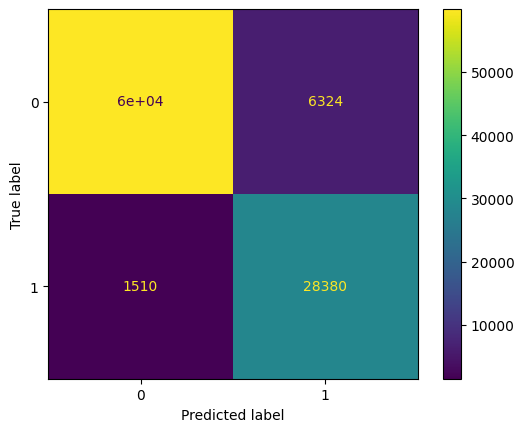

In [52]:
print(f'F1 Score: {f1_score(y_test,pred)}\n')
print(classification_report(y_test,pred))
plot_confusion_matrix(estimator=dt,X=X_test,y_true=y_test)

C:\Users\SAMEER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


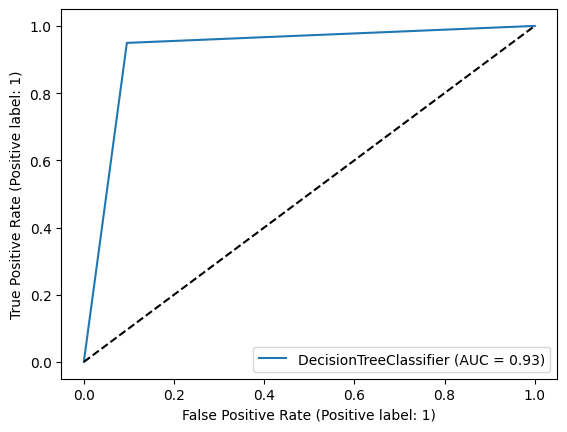

In [54]:
plot_roc_curve(estimator=dt,X=X_test,y=y_test)
plt.plot([0,1],[0,1],"--",c='black')

In [55]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10) 
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [56]:
#Prediction
y_pred = classifier.predict(X_test)
y_pred

C:\Users\SAMEER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [57]:
#Accuracy
Ac = classifier.score(X_test,y_test)
print("KNN Accuracy:",Ac)

C:\Users\SAMEER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy: 0.7210439268959922


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81     66247
           1       0.57      0.42      0.48     29890

    accuracy                           0.72     96137
   macro avg       0.67      0.64      0.65     96137
weighted avg       0.70      0.72      0.71     96137



[[56773  9474]
 [17344 12546]]


C:\Users\SAMEER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


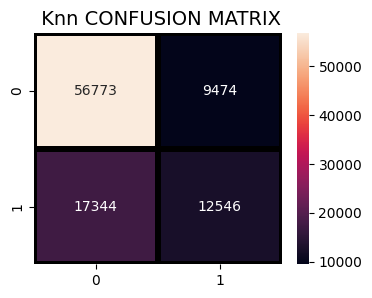

In [60]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, classifier.predict(X_test)),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" Knn CONFUSION MATRIX",fontsize=14)
plt.show()

In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [64]:
#Prediction
lr_pred = lr.predict(X_test)
lr_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
#Accuracy
Ac_lr = lr.score(X_test,y_test)
print("Logistic Regression accuracy is :",Ac_lr)

Logistic Regression accuracy is : 0.6890895284853906


In [66]:
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.69      1.00      0.82     66247
           1       0.00      0.00      0.00     29890

    accuracy                           0.69     96137
   macro avg       0.34      0.50      0.41     96137
weighted avg       0.47      0.69      0.56     96137



C:\Users\SAMEER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAMEER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAMEER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\SAMEER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


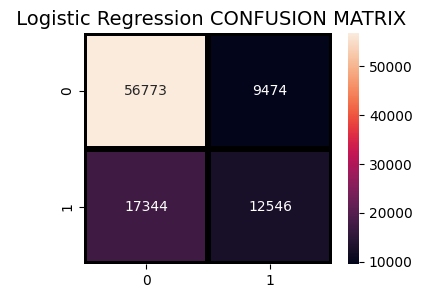

In [67]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, classifier.predict(X_test)),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" Logistic Regression CONFUSION MATRIX",fontsize=14)
plt.show()

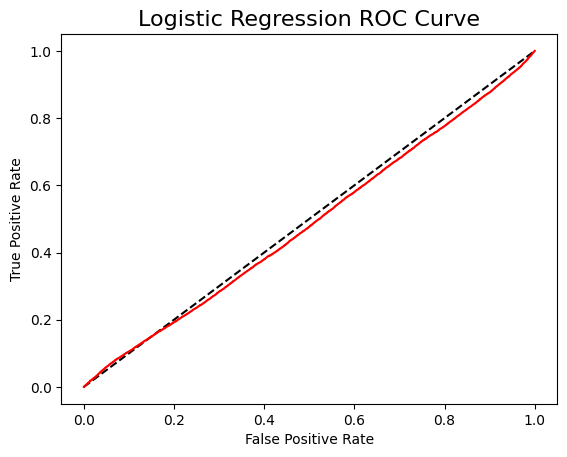

In [69]:
from sklearn.metrics import roc_curve

y_pred_prob = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

In [87]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)

AdaBoostClassifier()

In [88]:
a_preds = a_model.predict(X_test)
a_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.6884030082070379

In [71]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.69      0.98      0.81     66247
           1       0.49      0.05      0.09     29890

    accuracy                           0.69     96137
   macro avg       0.59      0.51      0.45     96137
weighted avg       0.63      0.69      0.59     96137



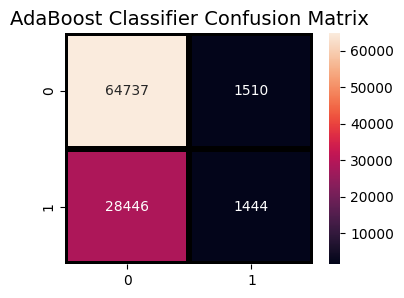

In [72]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

In [73]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

Gradient Boosting Accuracy: 0.6969533062192496


In [78]:
gb_pred = gb.predict(X_test)
gb_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
#Accuracy
Ac = gb.score(X_test,y_test)
print("Gradient Boosting Accuracy:",Ac)

Gradient Boosting Accuracy: 0.6969533062192496


In [74]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82     66247
           1       0.69      0.05      0.09     29890

    accuracy                           0.70     96137
   macro avg       0.69      0.52      0.45     96137
weighted avg       0.69      0.70      0.59     96137



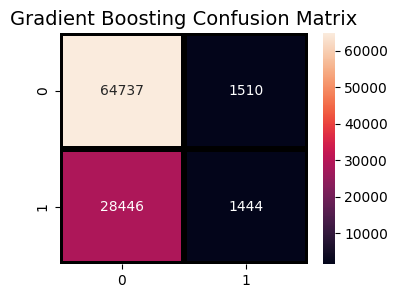

In [75]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Confusion Matrix",fontsize=14)
plt.show()

In [80]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)

VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                             ('lr', LogisticRegression()),
                             ('abc', AdaBoostClassifier())],
                 voting='soft')

In [83]:
predictions = eclf1.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81     66247
           1       0.57      0.42      0.48     29890

    accuracy                           0.72     96137
   macro avg       0.67      0.64      0.65     96137
weighted avg       0.70      0.72      0.71     96137



In [97]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82     66247
           1       0.86      0.00      0.01     29890

    accuracy                           0.69     96137
   macro avg       0.77      0.50      0.41     96137
weighted avg       0.74      0.69      0.57     96137



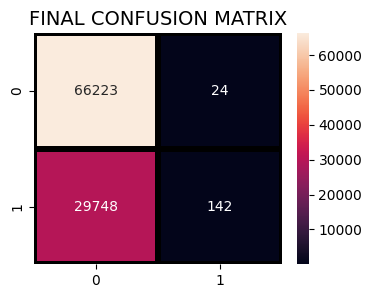

In [98]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

In [99]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=900 , oob_score = True, n_jobs = -1,
                                  random_state =5, max_features = "auto",
                                  max_leaf_nodes = 100)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=100, n_estimators=900, n_jobs=-1,
                       oob_score=True, random_state=5)

In [100]:
#Prediction
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

F1 Score: 0.8787193857014584

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     66247
           1       0.82      0.95      0.88     29890

    accuracy                           0.92     96137
   macro avg       0.90      0.93      0.91     96137
weighted avg       0.93      0.92      0.92     96137



C:\Users\SAMEER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


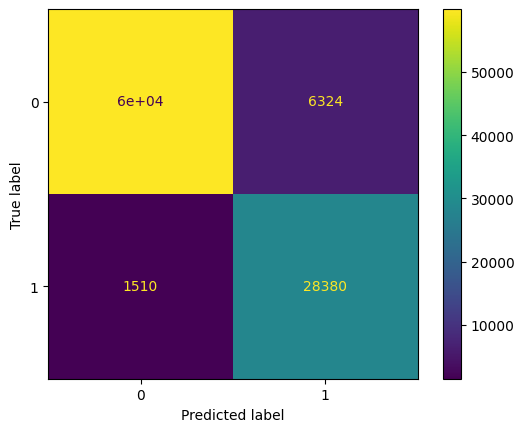

In [101]:
print(f'F1 Score: {f1_score(y_test,pred)}\n')
print(classification_report(y_test,pred))
plot_confusion_matrix(estimator=dt,X=X_test,y_true=y_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

In [ ]:
#Prediction
y_pred = classifier.predict(X_test)
y_pred

In [ ]:
print(f'F1 Score: {f1_score(y_test,pred)}\n')
print(classification_report(y_test,pred))
plot_confusion_matrix(estimator=dt,X=X_test,y_true=y_test)

# 
So, here I got 92% Accuracy in Decision Tres  and Random Foret Classifier
and low in Logistic 